## Detecting outliers

This step is outlier detection and subtracting from the dataset in order to create meaningful train and test subsets of data.



In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cars_df = pd.read_csv('data/CarsData.csv')

In [13]:
controlNegV = (cars_df['price'] < 0)
controlNegV.value_counts()

price
False    97712
Name: count, dtype: int64

In [17]:
quant1 = cars_df['price'].quantile(0.25)
quant3 = cars_df['price'].quantile(0.75)

min1 = quant1 - 1.5*(quant3 - quant1)
max1 = quant3 + 1.5*(quant3 - quant1)

print('min ', min1)
print('max ', max1)

controlDf = (cars_df['price'] < min1) | (cars_df['price'] > max1)

cars_df[controlDf]


min  -6127.5
max  36876.5


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
20,Q5,2020,37000,Semi-Auto,1000,Diesel,145,38.2,2.0,Audi
72,X5,2016,41211,Semi-Auto,46180,Petrol,570,25.4,4.4,BMW
98,X5,2018,37692,Automatic,24786,Diesel,145,47.1,3.0,BMW
104,GLC Class,2019,41995,Semi-Auto,1367,Diesel,150,40.4,2.0,merc
135,Q5,2020,37444,Automatic,3000,Petrol,145,32.1,2.0,Audi
...,...,...,...,...,...,...,...,...,...,...
97535,E Class,2020,39980,Semi-Auto,1096,Diesel,145,57.7,2.0,merc
97588,E Class,2019,38509,Automatic,4578,Diesel,145,57.7,2.0,merc
97606,E Class,2019,39700,Semi-Auto,2077,Hybrid,135,188.3,2.0,merc
97609,GLC Class,2019,37000,Semi-Auto,5529,Diesel,145,40.9,2.0,merc


In [18]:
min1 = quant1 - 2*(quant3 - quant1)
max1 = quant3 + 2*(quant3 - quant1)
print('min ', min1)
print('max ', max1)
controlDf = (cars_df['price'] < min1) | (cars_df['price'] > max1)

cars_df[controlDf]

min  -11503.0
max  42252.0


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
141,5 Series,2019,42650,Semi-Auto,101,Petrol,145,50.4,2.0,BMW
142,8 Series,2020,56990,Semi-Auto,3242,Petrol,150,33.6,3.0,BMW
158,GLE Class,2019,54991,Automatic,1644,Diesel,145,32.8,3.0,merc
182,Q5,2020,45000,Semi-Auto,2500,Diesel,145,37.2,2.0,Audi
186,Q7,2019,52995,Automatic,8000,Diesel,145,33.2,3.0,Audi
...,...,...,...,...,...,...,...,...,...,...
97462,RS3,2020,42490,Automatic,320,Petrol,145,29.7,2.5,Audi
97486,A4,2019,43950,Semi-Auto,4293,Diesel,145,39.8,3.0,Audi
97494,Q5,2019,49990,Automatic,6000,Diesel,145,34.5,3.0,Audi
97495,C Class,2019,66699,Semi-Auto,630,Petrol,145,28.5,4.0,merc


### Detecting the anomalies that do not fit to the rest of the data. If were overlapping, so filtered to the relevant criteria to take a closer look.

In [2]:
cars_df.Manufacturer.unique()

array(['hyundi', 'volkswagen', 'BMW', 'skoda', 'ford', 'toyota', 'merc',
       'vauxhall', 'Audi'], dtype=object)

In [3]:
def plotOutliers(item: str, columnName: str):
    plt.figure(figsize=(12, 7))
    plt.title('Year vs. Price for '+ item)
    plt.xlabel('Year')
    plt.ylabel('Price')
    sns.barplot(x=cars_df.loc[cars_df[columnName] == item]['year'],  y=cars_df.price)

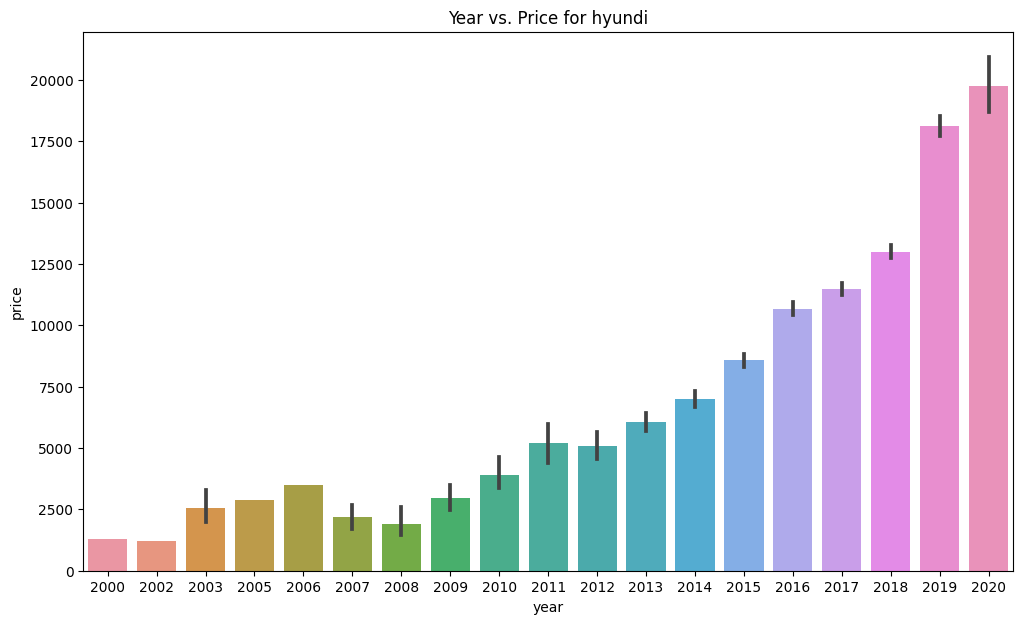

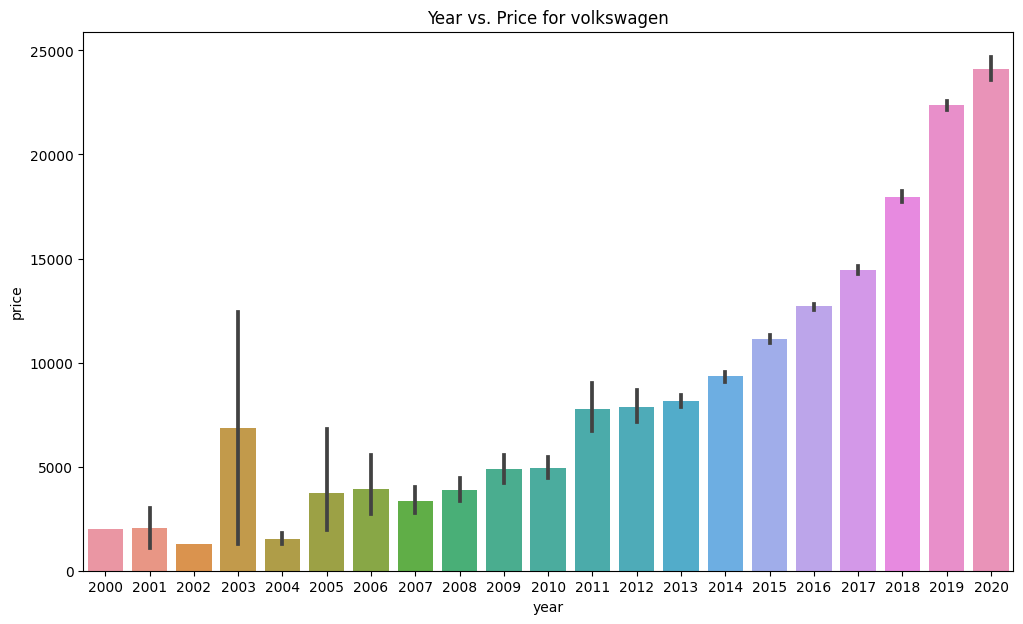

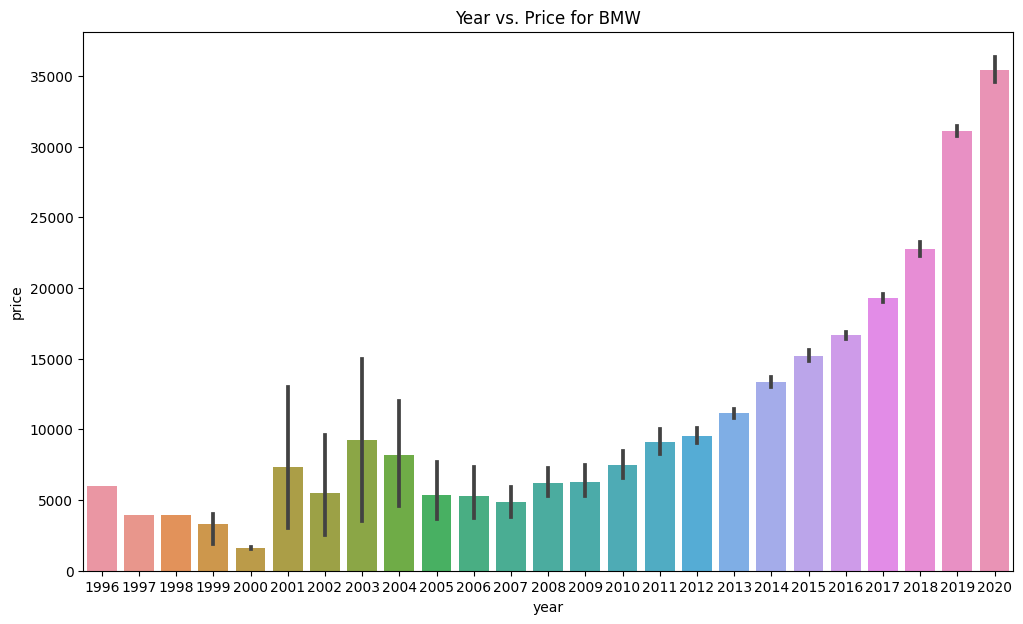

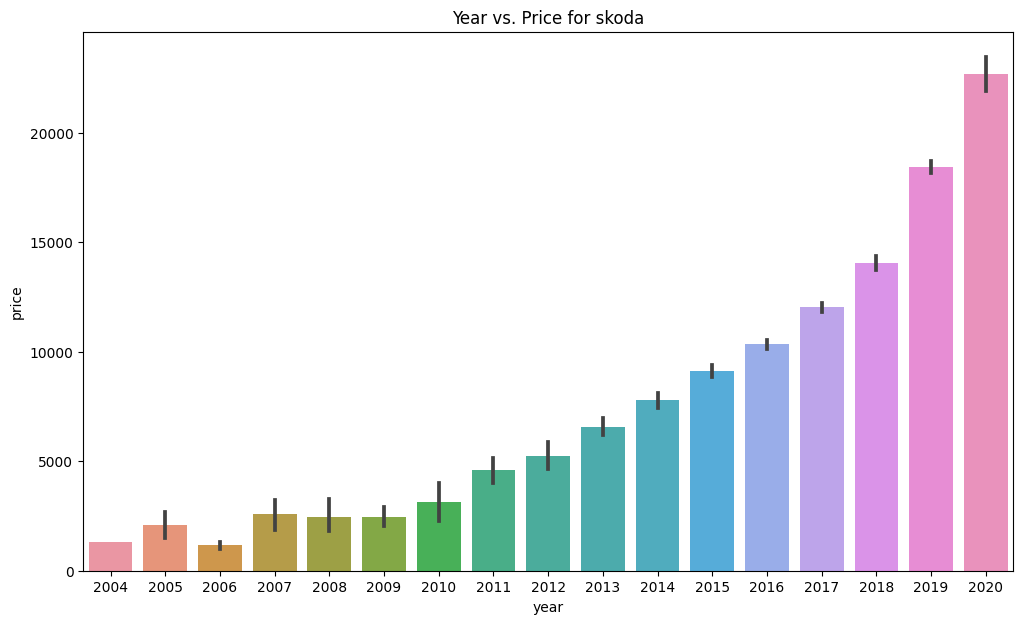

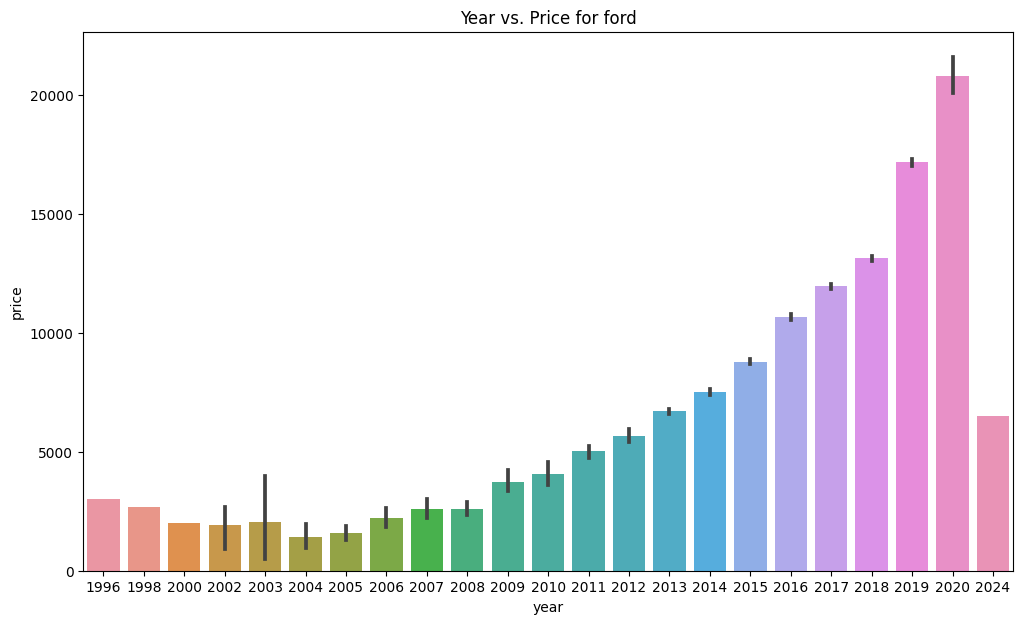

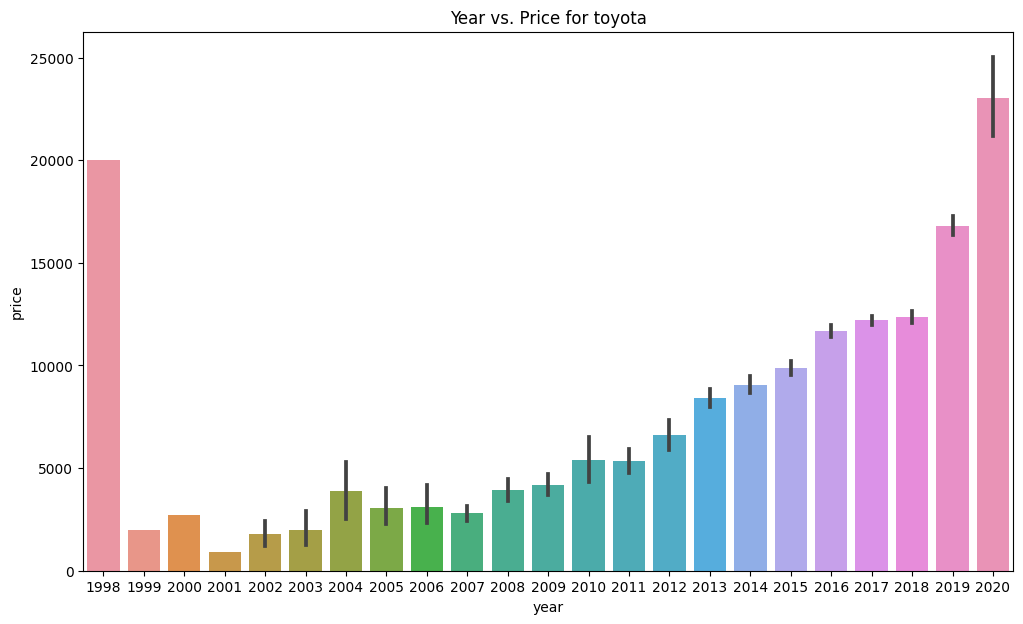

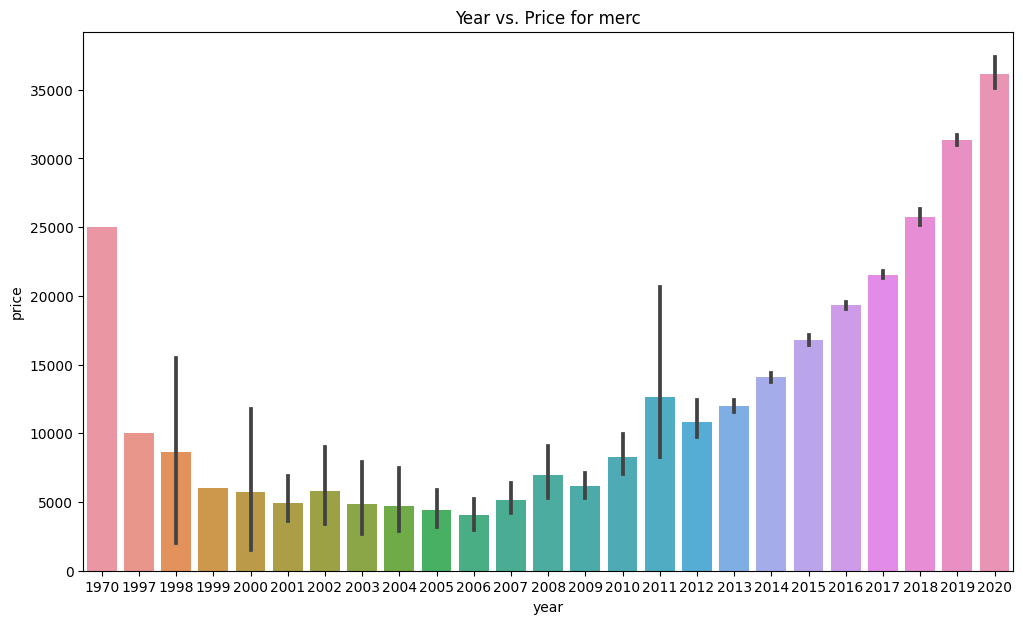

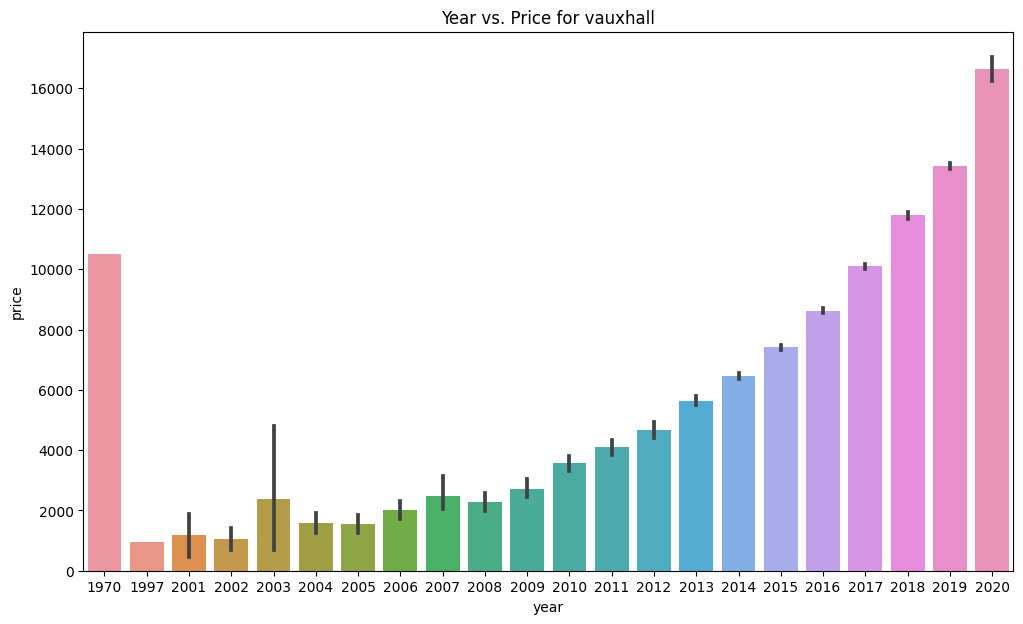

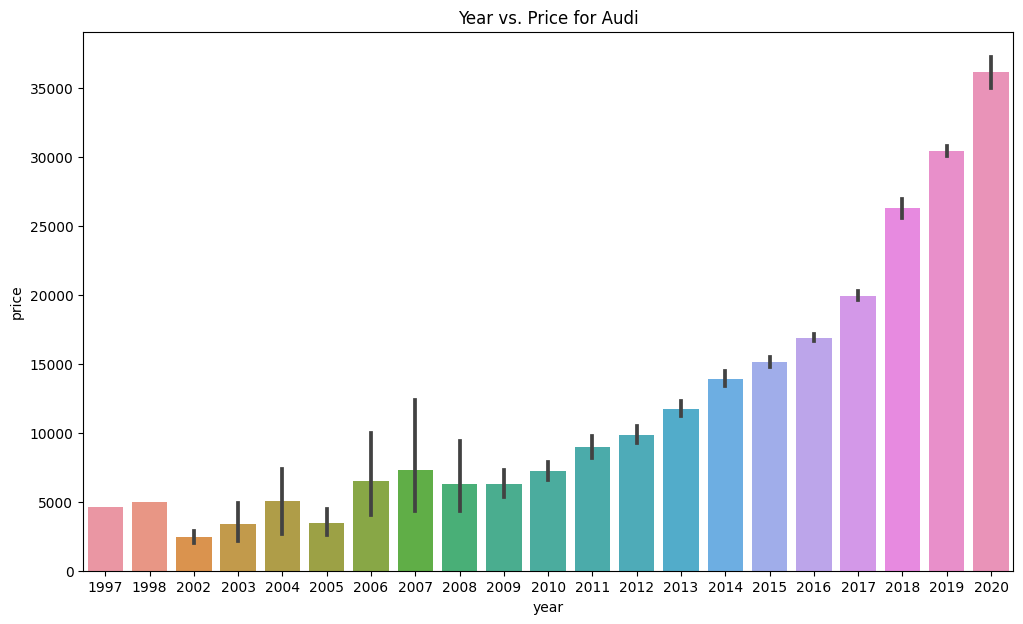

In [5]:
columnName = 'Manufacturer'
for prop in cars_df[columnName].unique():
    plotOutliers(prop, columnName)

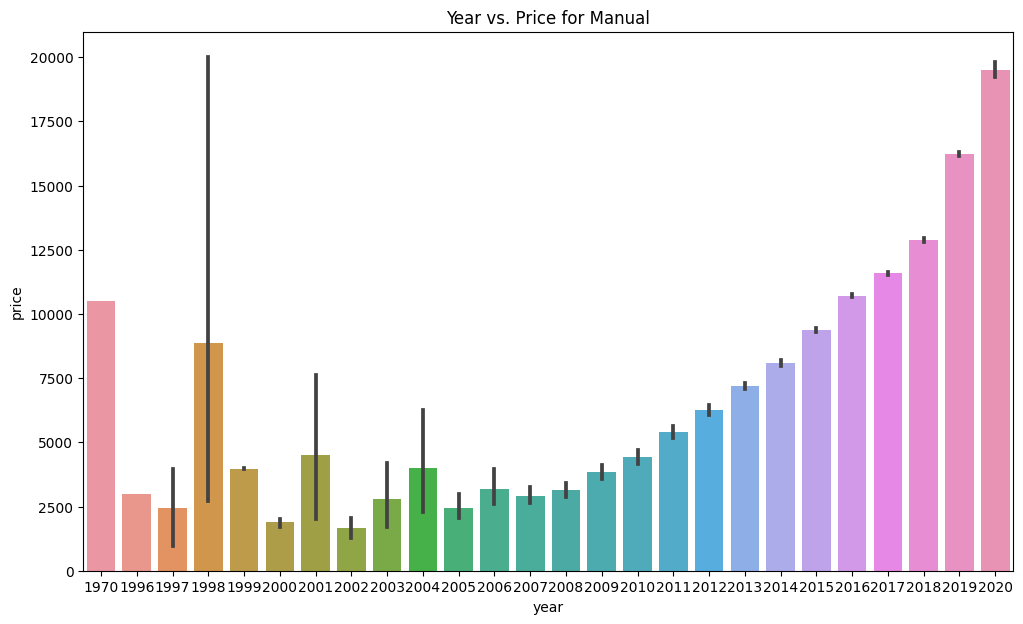

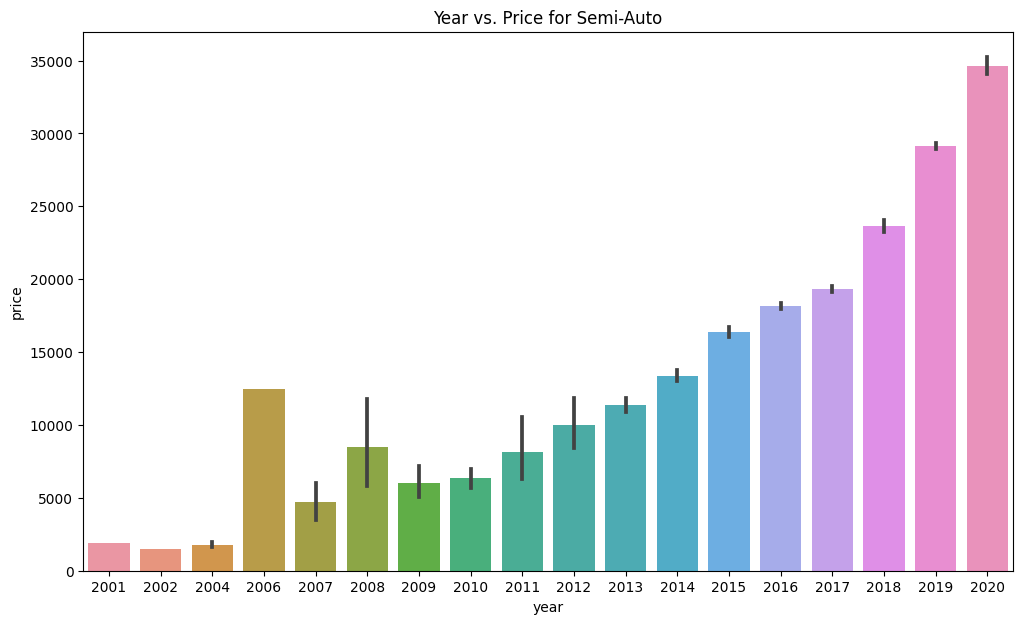

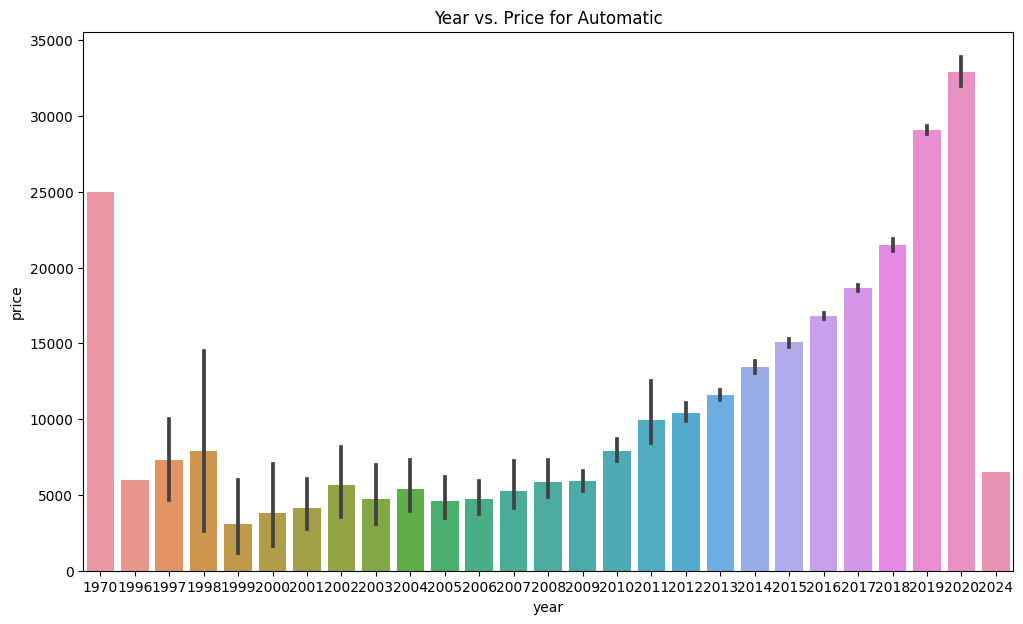

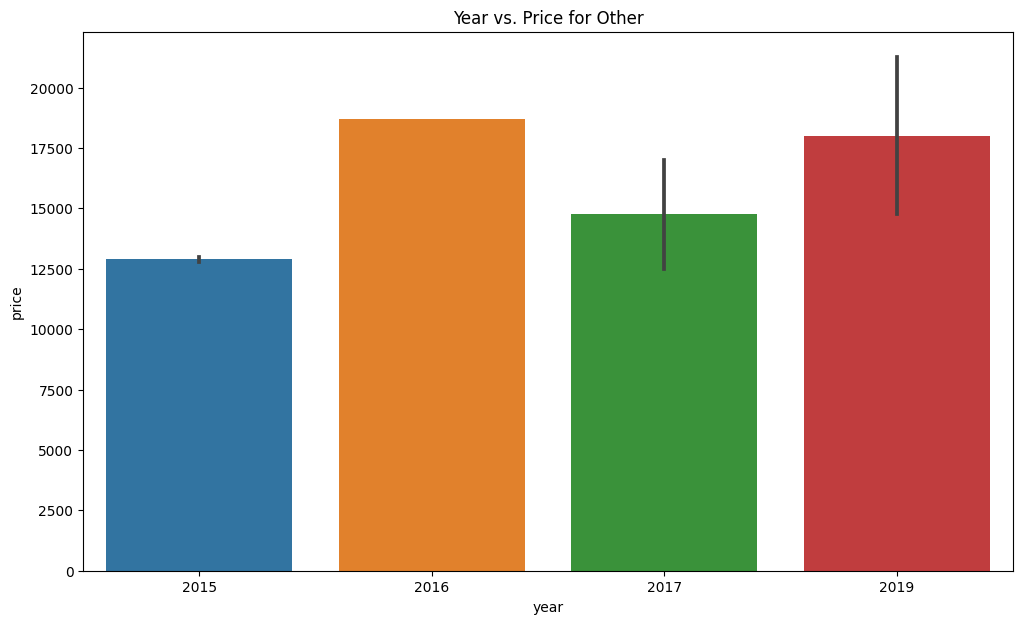

In [6]:
columnName = 'transmission'
for prop in cars_df[columnName].unique():
    plotOutliers(prop, columnName)

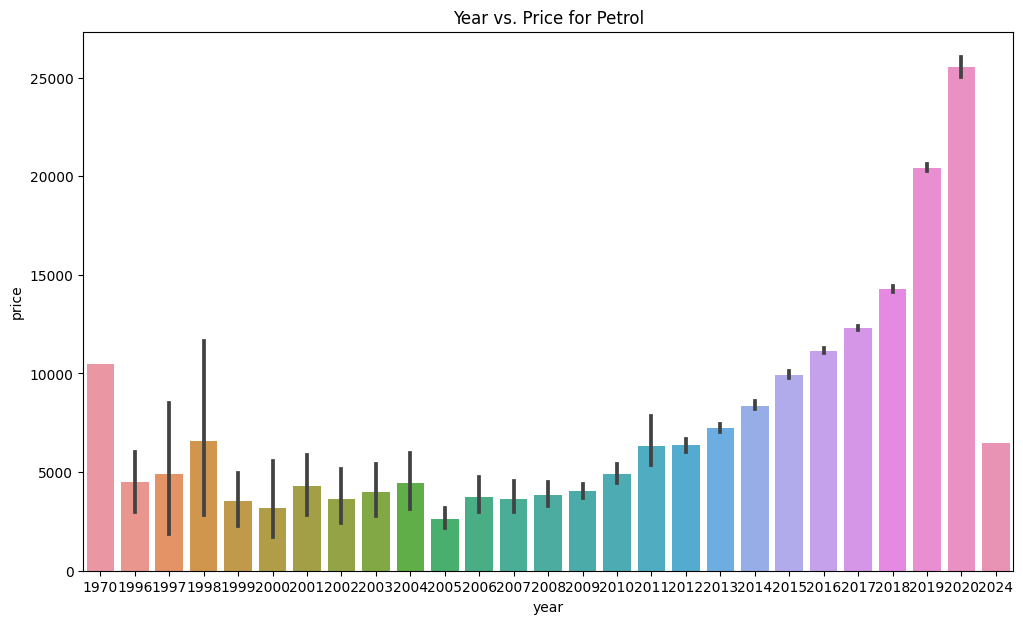

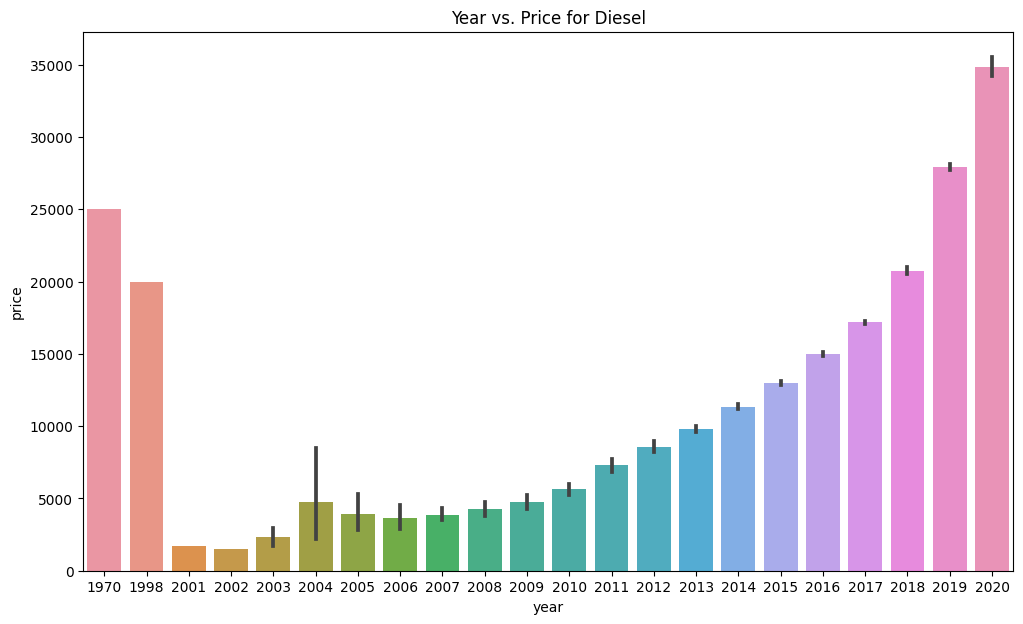

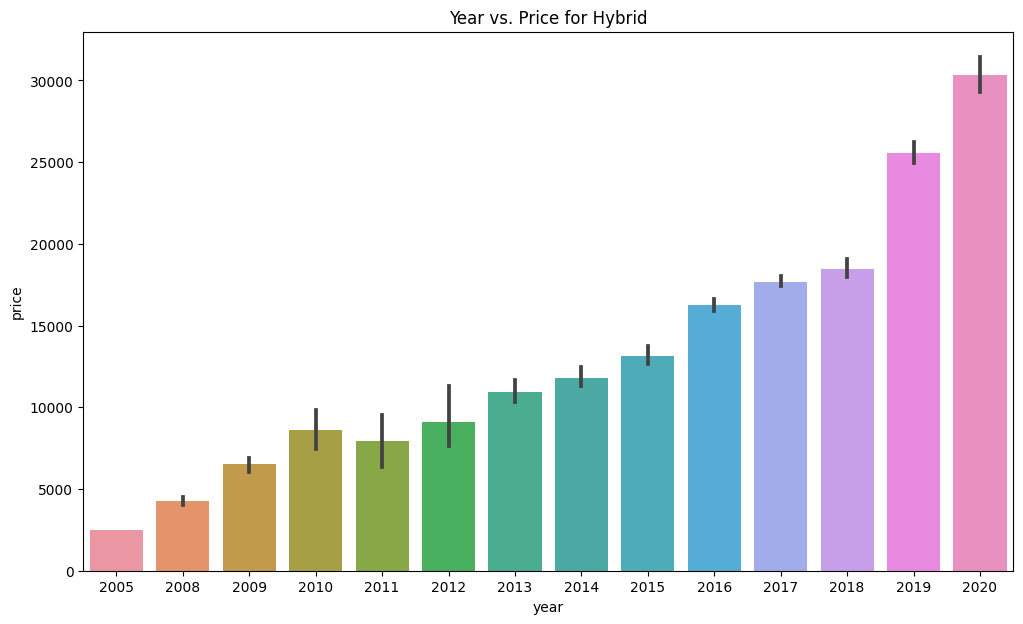

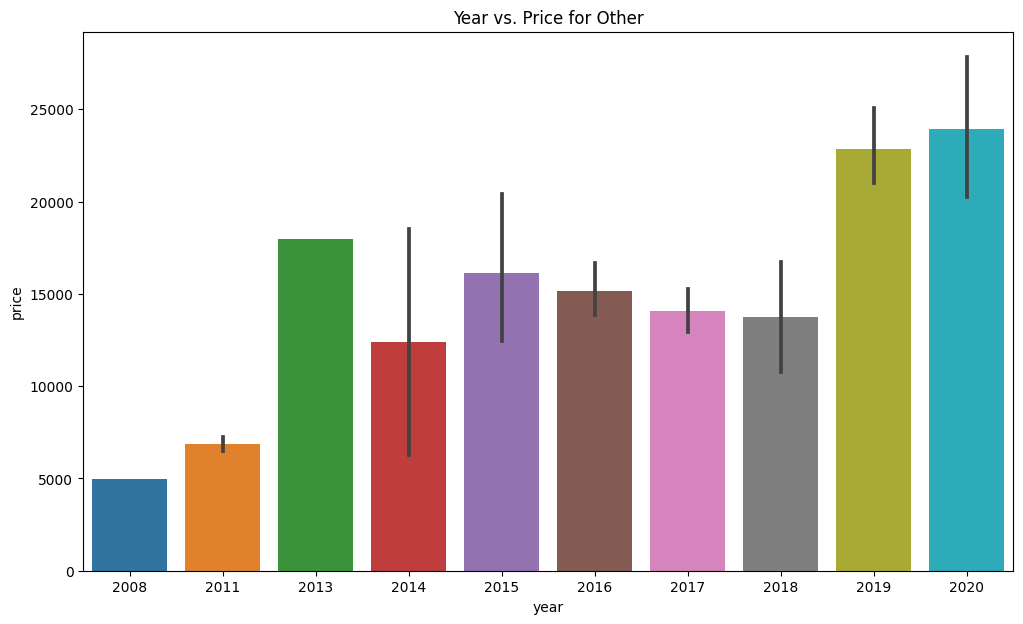

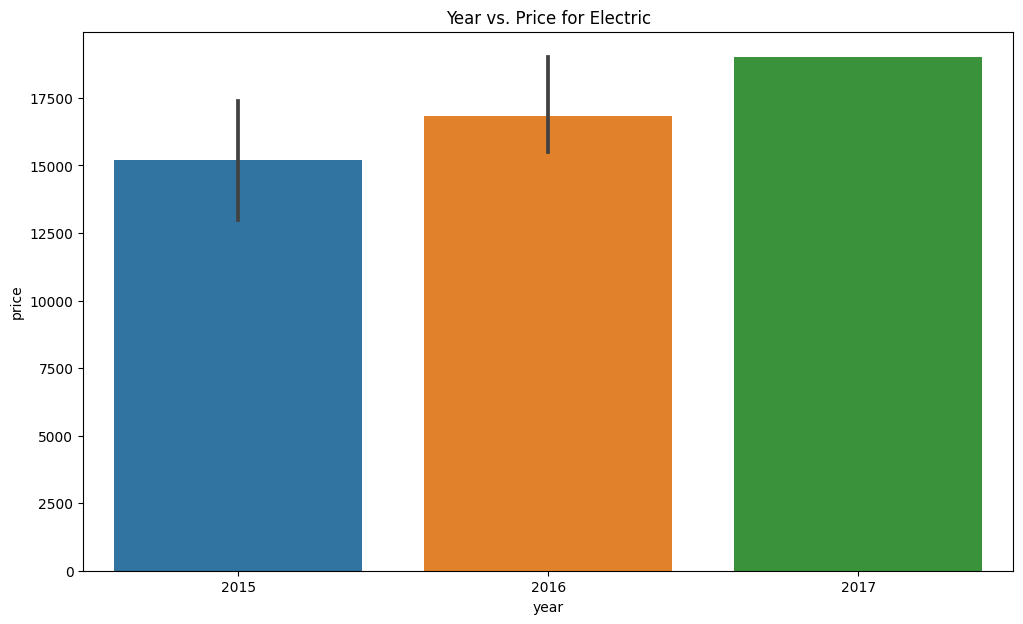

In [7]:
columnName = 'fuelType'
for prop in cars_df[columnName].unique():
    plotOutliers(prop, columnName)